In [116]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=(6,6)
sns.set()
sns.set(style="darkgrid")

In [135]:
# Load the dataset
data = pd.read_csv('insurance.csv')
#link of the dataset
#https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv
# Examine the overall structure of the dataset
print(data.head())


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


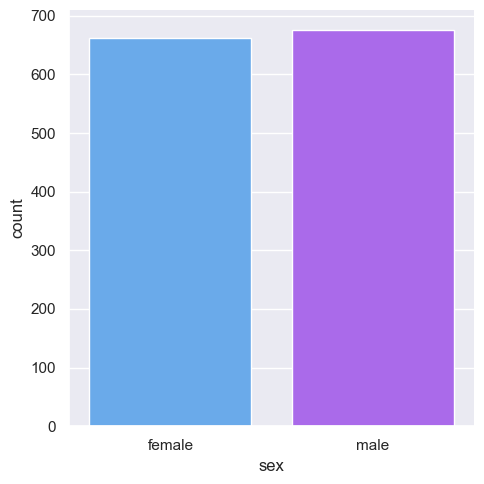

In [136]:
sns.catplot(x="sex", kind="count", palette="cool", data=data)

In [137]:
# Print the unique values in the 'region' column
unique_regions = data['region'].unique()
print(unique_regions)


['southwest' 'southeast' 'northwest' 'northeast']


In [143]:
# Replace 'female' in the 'sex' column with 0 and 'male' with 1
data['sex'] = data['sex'].replace({'female': 0, 'male': 1})

# Replace 'yes' in the 'smoker' column with 1 and 'no' with 0
data['smoker'] = data['smoker'].replace({'no': 0, 'yes': 1})

# Replace the names in the 'region' column with 0, 1, 2, 3
data['region'] = data['region'].replace({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})

# Display the first few rows of the data to check the changes
print(data.head())



   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       0  16884.92400
1   18    1  33.770         1       0       1   1725.55230
2   28    1  33.000         3       0       1   4449.46200
3   33    1  22.705         0       0       2  21984.47061
4   32    1  28.880         0       0       2   3866.85520


In [144]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB
None


In [145]:
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.484305,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


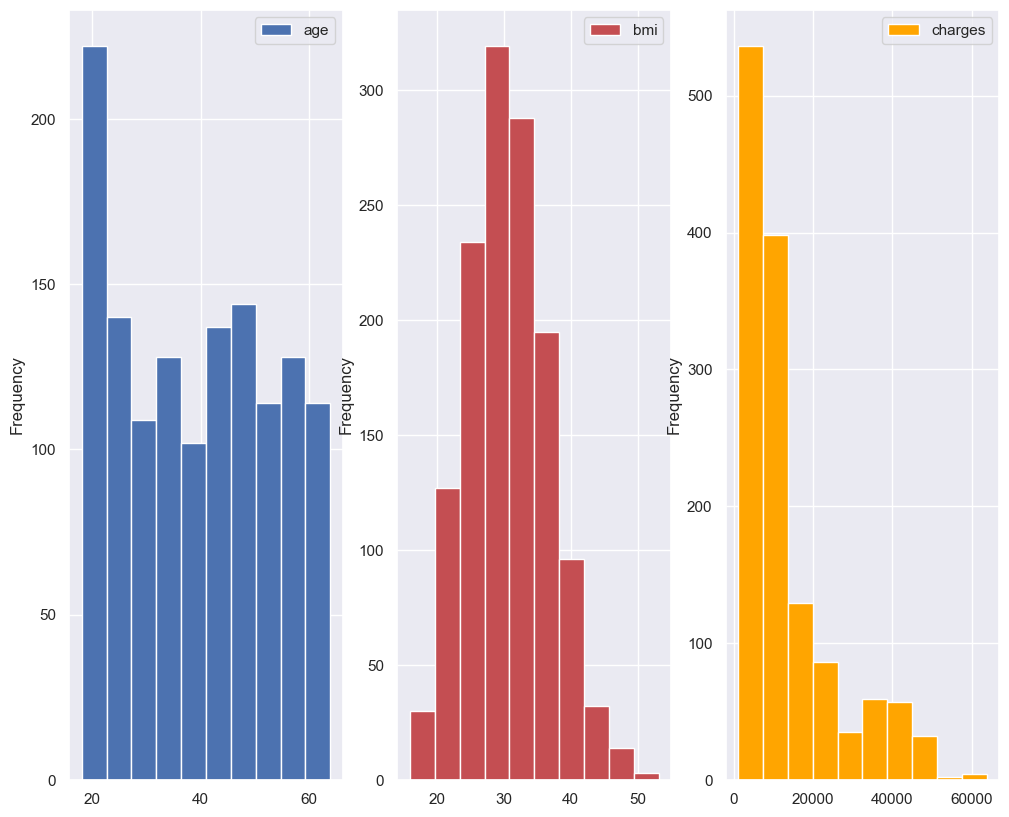

In [146]:
fig, axes = plt.subplots(ncols=3, figsize=(12, 10))
data.plot(kind="hist", y="age", color="b", ax=axes[0])
data.plot(kind="hist", y="bmi", color="r", ax=axes[1])
data.plot(kind="hist", y="charges", color="orange", ax=axes[2])
plt.show()

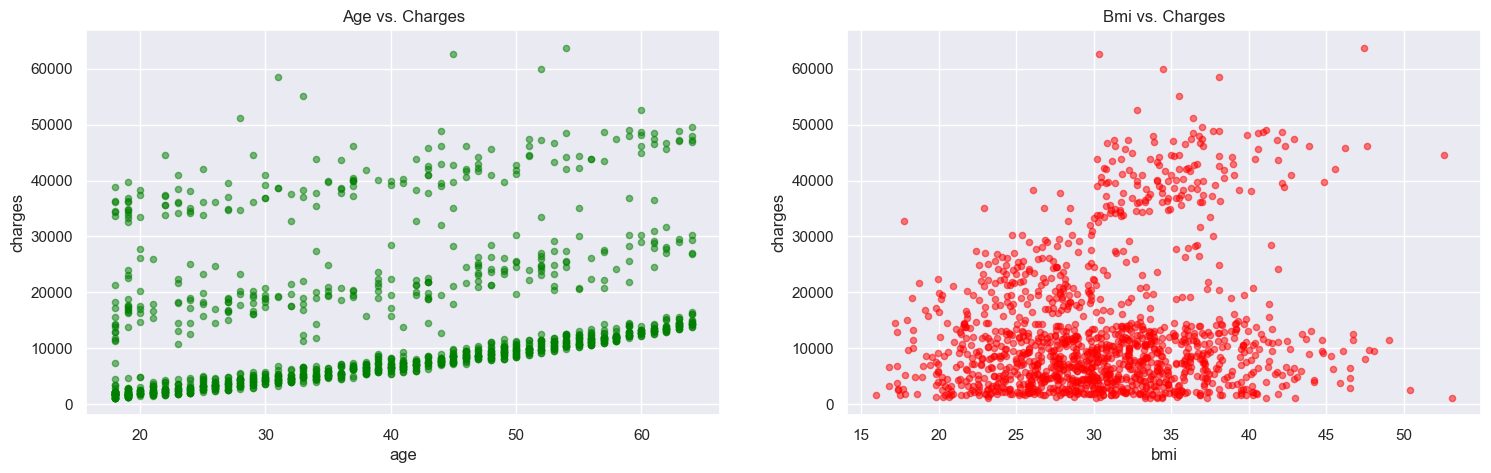

In [147]:
fig, axes = plt.subplots(ncols=2, figsize=(18, 5))
data.plot(kind='scatter', x='age', y='charges', alpha=0.5, color='green', ax=axes[0], title="Age vs. Charges")
data.plot(kind='scatter', x='bmi', y='charges', alpha=0.5, color='red', ax=axes[1], title="Bmi vs. Charges")
plt.show()

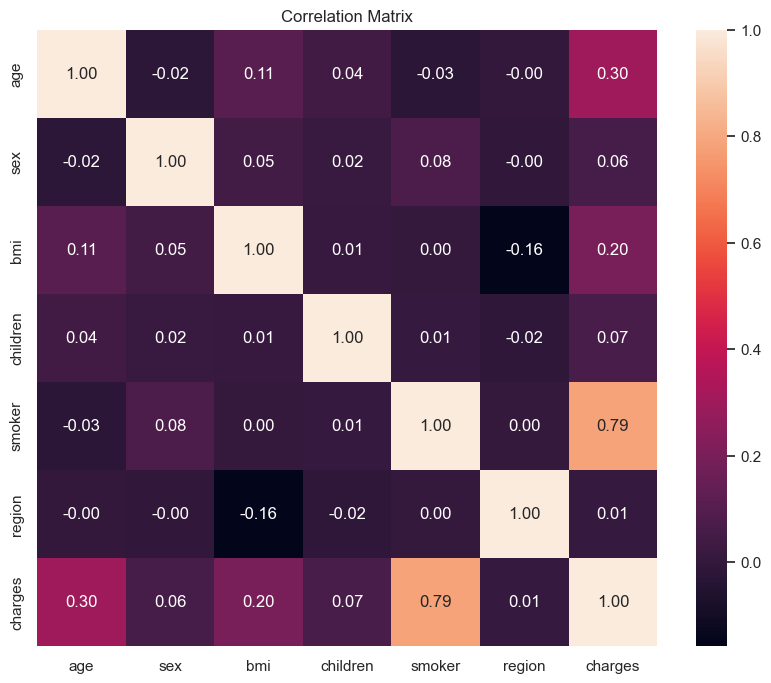

In [149]:
# Visualize the correlation matrix
plt.figure(figsize=(10, 8))

sns.heatmap(data.corr(), annot=True,  fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


## Ridge Regression

In [155]:
from sklearn.linear_model import Ridge

# Selecting independent variables and the target variable
X = data.drop('charges', axis=1)
y = data['charges']

# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the Ridge Regression model
ridge_regression = Ridge(alpha=1.0) 
ridge_regression.fit(X_train, y_train)

# Making predictions on the training set
ridge_train_predictions = ridge_regression.predict(X_train)

# Evaluating the model performance - training set
print('Ridge Training Set R^2 Score:', r2_score(y_train, ridge_train_predictions))
print('Ridge Training Set Mean Squared Error (MSE):', mean_squared_error(y_train, ridge_train_predictions))

# Making predictions on the test set
ridge_test_predictions = ridge_regression.predict(X_test)

# Evaluating the model performance - test set
print('Ridge Test Set R^2 Score:', r2_score(y_test, ridge_test_predictions))
print('Ridge Test Set Mean Squared Error (MSE):', mean_squared_error(y_test, ridge_test_predictions))


Ridge Training Set R^2 Score: 0.7416842834992985
Ridge Training Set Mean Squared Error (MSE): 37283642.964802444
Ridge Test Set R^2 Score: 0.78308491263913
Ridge Test Set Mean Squared Error (MSE): 33675792.15420229


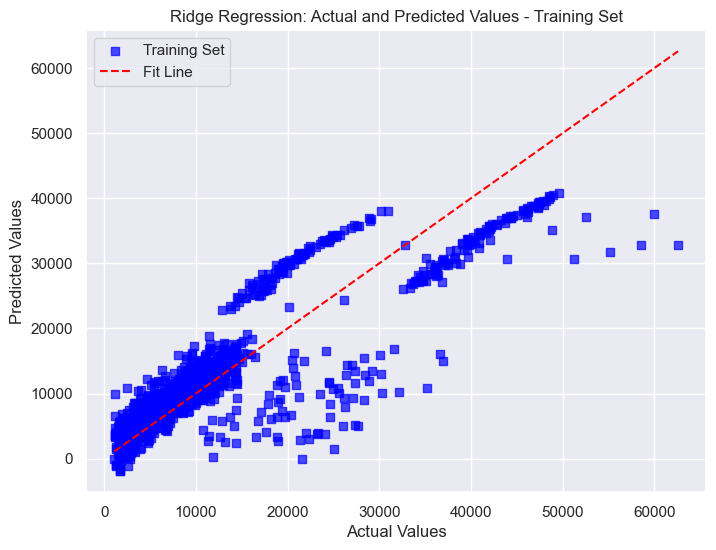

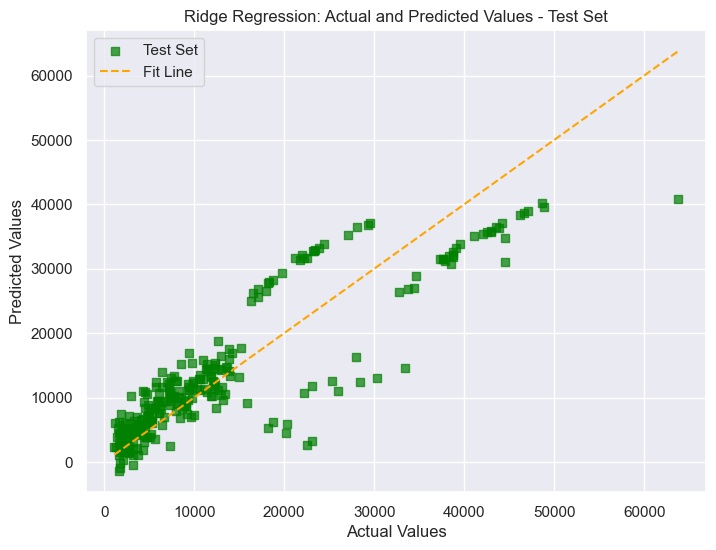

In [127]:
plt.figure(figsize=(8, 6))

# Graph showing the relationship between actual and predicted values for the training set
plt.scatter(y_train, ridge_train_predictions, marker='s', color='blue', alpha=0.7, label='Training Set')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', label='Fit Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Ridge Regression: Actual and Predicted Values - Training Set')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))

# Test seti için gerçek ve tahmin edilen değerler arasındaki ilişkiyi gösteren grafik
plt.scatter(y_test, ridge_test_predictions, marker='s', color='green', alpha=0.7, label='Test Set')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='orange', label='Fit Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Ridge Regression: Actual and Predicted Values - Test Set')
plt.legend()
plt.grid(True)
plt.show()


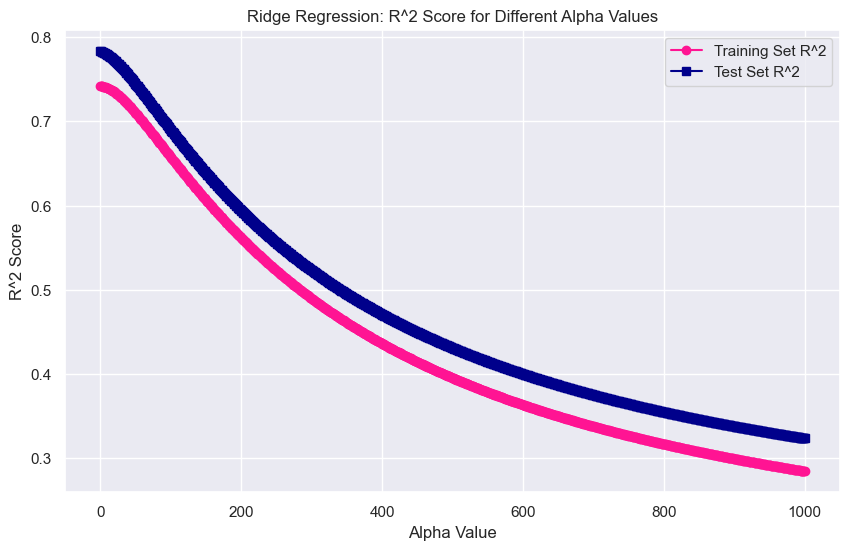

In [156]:
import matplotlib.pyplot as plt
import numpy as np

alphas = np.linspace(0, 1000, 1000)  # Different alpha values
train_r2 = []
test_r2 = []

for alpha in alphas:
    ridge_regression = Ridge(alpha=alpha)
    ridge_regression.fit(X_train, y_train)
    
    # Making predictions on the training set and calculating the R^2 score
    ridge_tr_predictions = ridge_regression.predict(X_train)
    train_r2.append(r2_score(y_train, ridge_tr_predictions))
    
    # Making predictions on the test set and calculating the R^2 score
    ridge_tst_predictions = ridge_regression.predict(X_test)
    test_r2.append(r2_score(y_test, ridge_tst_predictions))

# Graph showing the R^2 scores
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_r2, label='Training Set R^2', marker='o', linestyle='-', color='deeppink')
plt.plot(alphas, test_r2, label='Test Set R^2', marker='s', linestyle='-', color='darkblue')
plt.xlabel('Alpha Value')
plt.ylabel('R^2 Score')
plt.title('Ridge Regression: R^2 Score for Different Alpha Values')
plt.legend()
plt.grid(True)
plt.show()





In [157]:
np.argmax(np.array(test_r2))


0

In [158]:
print(f'Best alpha value is {alphas[np.argmax(np.array(test_r2))]}')

Best alpha value is 0.0


## Polynomial Regression

In [159]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Selecting independent variables and the target variable
X = data.drop('charges', axis=1)
y = data['charges']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the polynomial regression model
degree = 2  # Polynomial degree
polyreg = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=1.0))
polyreg.fit(X_train, y_train)

# Making predictions on the training set
poly_train_predictions = polyreg.predict(X_train)

# Evaluating the model performance on the training set
print('Polynomial Regression Training Set R^2 Score:', r2_score(y_train, poly_train_predictions))
print('Polynomial Regression Training Set Mean Squared Error (MSE):', mean_squared_error(y_train, poly_train_predictions))

# Making predictions on the test set
poly_test_predictions = polyreg.predict(X_test)

# Evaluating the model performance on the test set
print('Polynomial Regression Test Set R^2 Score:', r2_score(y_test, poly_test_predictions))
print('Polynomial Regression Test Set Mean Squared Error (MSE):', mean_squared_error(y_test, poly_test_predictions))



Polynomial Regression Training Set R^2 Score: 0.8403962273155077
Polynomial Regression Training Set Mean Squared Error (MSE): 23036190.585747585
Polynomial Regression Test Set R^2 Score: 0.8677197825383448
Polynomial Regression Test Set Mean Squared Error (MSE): 20536335.962377917


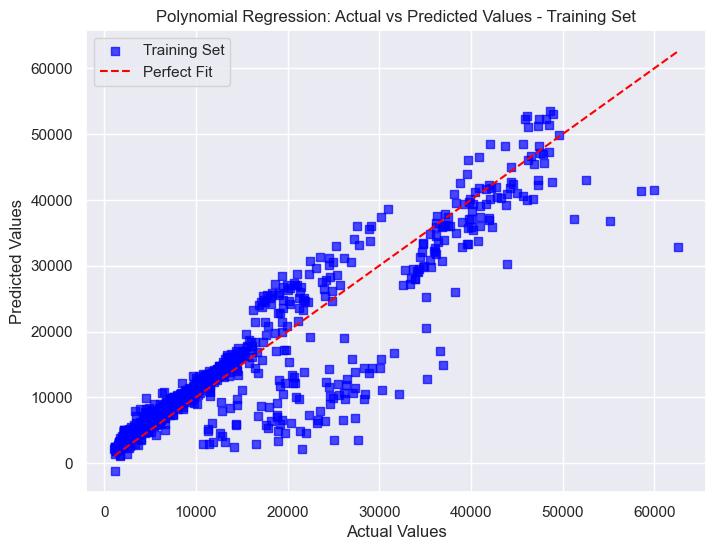

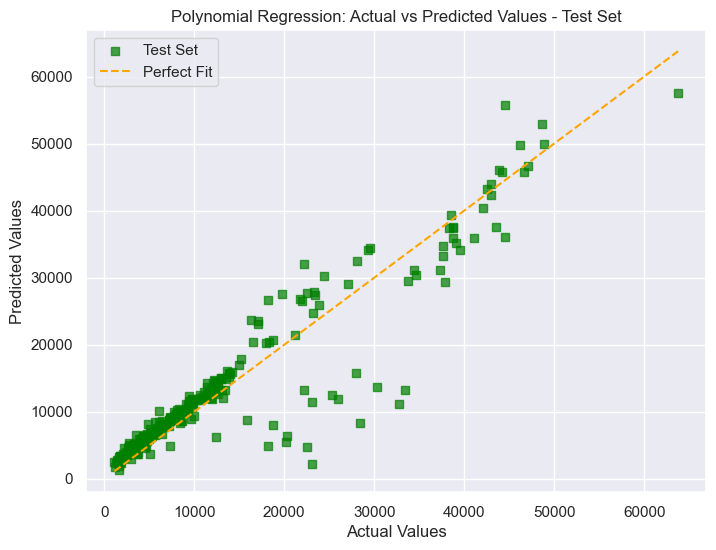

In [160]:
plt.figure(figsize=(8, 6))

# Relationship between actual and predicted values for the training set
plt.scatter(y_train, poly_train_predictions, marker='s', color='blue', alpha=0.7, label='Training Set')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', label='Perfect Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Polynomial Regression: Actual vs Predicted Values - Training Set')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))

# Relationship between actual and predicted values for the test set
plt.scatter(y_test, poly_test_predictions, marker='s', color='green', alpha=0.7, label='Test Set')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='orange', label='Perfect Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Polynomial Regression: Actual vs Predicted Values - Test Set')
plt.legend()
plt.grid(True)
plt.show()




## Comparison

In [161]:
# Ridge Regression R^2 Score
print('Ridge Regression Training Set R^2 Score:', r2_score(y_train, ridge_train_predictions))
print('Ridge Regression Test Set R^2 Score:', r2_score(y_test, ridge_test_predictions))

# Polynomial Regression R^2 Score
print('Polynomial Regression Training Set R^2 Score:', r2_score(y_train, poly_train_predictions))
print('Polynomial Regression Test Set R^2 Score:', r2_score(y_test, poly_test_predictions))

# Ridge Regression MSE Value
print('Ridge Regression Training Set MSE:', mean_squared_error(y_train, ridge_train_predictions))
print('Ridge Regression Test Set MSE:', mean_squared_error(y_test, ridge_test_predictions))

# Polynomial Regression MSE Value
print('Polynomial Regression Training Set MSE:', mean_squared_error(y_train, poly_train_predictions))
print('Polynomial Regression Test Set MSE:', mean_squared_error(y_test, poly_test_predictions))


Ridge Regression Training Set R^2 Score: 0.7416842834992985
Ridge Regression Test Set R^2 Score: 0.78308491263913
Polynomial Regression Training Set R^2 Score: 0.8403962273155077
Polynomial Regression Test Set R^2 Score: 0.8677197825383448
Ridge Regression Training Set MSE: 37283642.964802444
Ridge Regression Test Set MSE: 33675792.15420229
Polynomial Regression Training Set MSE: 23036190.585747585
Polynomial Regression Test Set MSE: 20536335.962377917


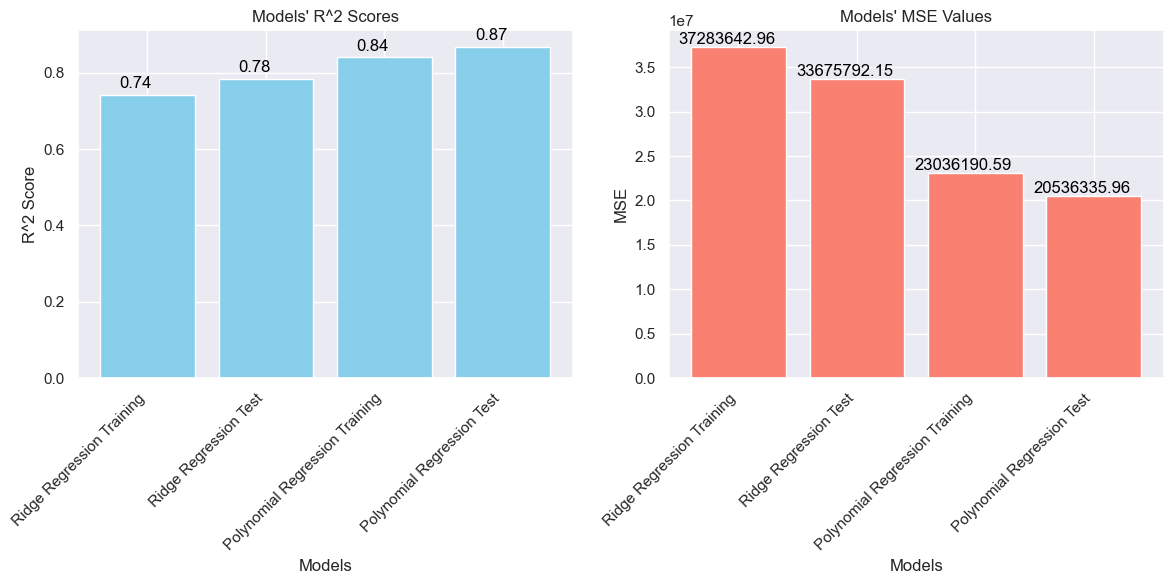

In [162]:
import matplotlib.pyplot as plt
import pandas as pd

# Creating an example DataFrame
data = {
    'Model': ['Ridge Regression Training', 'Ridge Regression Test', 'Polynomial Regression Training', 'Polynomial Regression Test'],
    'R^2 Score': [r2_score(y_train, ridge_train_predictions), r2_score(y_test, ridge_test_predictions),
                  r2_score(y_train, poly_train_predictions), r2_score(y_test, poly_test_predictions)],
    'MSE': [mean_squared_error(y_train, ridge_train_predictions), mean_squared_error(y_test, ridge_test_predictions),
            mean_squared_error(y_train, poly_train_predictions), mean_squared_error(y_test, poly_test_predictions)]
}

results_df = pd.DataFrame(data)

plt.figure(figsize=(12, 6))

# R^2 scores
plt.subplot(1, 2, 1)
bars = plt.bar(results_df['Model'], results_df['R^2 Score'], color='skyblue')
plt.xlabel('Models')
plt.ylabel('R^2 Score')
plt.title('Models\' R^2 Scores')
plt.xticks(rotation=45, ha='right')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.01, round(bar.get_height(), 2), 
             va='bottom', ha='center', color='black')

# MSE values
plt.subplot(1, 2, 2)
bars = plt.bar(results_df['Model'], results_df['MSE'], color='salmon')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.title('Models\' MSE Values')
plt.xticks(rotation=45, ha='right')
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 50, round(bar.get_height(), 2), 
             va='bottom', ha='center', color='black')

plt.tight_layout()
plt.show()



In [163]:
results_df.head()

,Model,R^2 Score,MSE
0,Ridge Regression Training,0.741684,3.728364e+07
1,Ridge Regression Test,0.783085,3.367579e+07
2,Polynomial Regression Training,0.840396,2.303619e+07
3,Polynomial Regression Test,0.867720,2.053634e+07
